In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Aldon Smith_Trans 1.csv"
csv_path2 = "../Player Tweets/Aldon Smith_Trans 2.csv"
csv_path3 = "../Player Tweets/Aldon Smith_Trans 3.csv"


#Establish pd dataframe for each file
aldonsmith1 = pd.read_csv(csv_path1, sep=";", error_bad_lines=False)
aldonsmith2 = pd.read_csv(csv_path2, sep=";")
aldonsmith3 = pd.read_csv(csv_path3, sep=";")

#concatenate data frames 
aldonsmith_master = pd.concat([aldonsmith1, aldonsmith2, aldonsmith3])
aldonsmith_master

b'Skipping line 1863: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2011-05-04 15:09,0,0,BYI from Bodog: Post-draft Super Bowl odds has...,NaN,NaN,NaN,6.587075e+16,https://twitter.com/SamuelYLam/status/65870746...
1,NaN,2011-05-04 14:23,0,0,@ PatrickWillis52 what's your thoughts on Aldo...,NaN,@,NaN,6.585909e+16,https://twitter.com/noman849/status/6585908701...
2,NaN,2011-05-04 14:18,0,0,@ PatrickWillis52 did you already know aldon s...,NaN,@,NaN,6.585774e+16,https://twitter.com/asosa49/status/65857740714...
3,NaN,2011-05-04 14:03,0,0,Getting to know your 49ers draft picks: LB Ald...,NaN,NaN,NaN,6.585409e+16,https://twitter.com/breakingsfnews/status/6585...
4,NaN,2011-05-04 13:40,0,0,@ MaioccoCSN do u know what number is Aldon Sm...,NaN,@,NaN,6.584834e+16,https://twitter.com/zosaucee/status/6584833944...
5,NaN,2011-05-04 13:40,0,0,@ ShaunPhillips95 does aldon smith remind you ...,NaN,@,NaN,6.584819e+16,https://twitter.com/bigsexy1619/status/6584818...
6,NaN,2011-05-04 13:33,1,0,San Francisco 49ers Examiner >> Getting to kno...,NaN,NaN,NaN,6.584654e+16,https://twitter.com/49ersbuzztap/status/658465...
7,NaN,2011-05-04 13:22,0,0,Peter Fournier's Column Roundtable: Aldon Smit...,NaN,NaN,NaN,6.584384e+16,https://twitter.com/P_Fournier/status/65843840...
8,NaN,2011-05-04 12:54,0,0,RT @ 49ers Baalke on Aldon Smith: The range an...,NaN,@,NaN,6.583671e+16,https://twitter.com/CRiley1111/status/65836712...
9,NaN,2011-05-04 11:32,5,0,Baalke on Aldon Smith: The range and versatili...,NaN,NaN,NaN,6.581600e+16,https://twitter.com/49ers/status/6581600068738...


In [2]:
#fillna's with text to fix error
aldonsmith_master["text"].fillna("text", inplace=True)
aldonsmith_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2011-05-04 15:09,0,0,BYI from Bodog: Post-draft Super Bowl odds has...,NaN,NaN,NaN,6.587075e+16,https://twitter.com/SamuelYLam/status/65870746...
1,NaN,2011-05-04 14:23,0,0,@ PatrickWillis52 what's your thoughts on Aldo...,NaN,@,NaN,6.585909e+16,https://twitter.com/noman849/status/6585908701...
2,NaN,2011-05-04 14:18,0,0,@ PatrickWillis52 did you already know aldon s...,NaN,@,NaN,6.585774e+16,https://twitter.com/asosa49/status/65857740714...
3,NaN,2011-05-04 14:03,0,0,Getting to know your 49ers draft picks: LB Ald...,NaN,NaN,NaN,6.585409e+16,https://twitter.com/breakingsfnews/status/6585...
4,NaN,2011-05-04 13:40,0,0,@ MaioccoCSN do u know what number is Aldon Sm...,NaN,@,NaN,6.584834e+16,https://twitter.com/zosaucee/status/6584833944...


In [3]:
#create list of sentiment scores associated with tweets about relevant player

aldonsmith_sent = []

tweets = aldonsmith_master["text"]

for index,tweet in aldonsmith_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    aldonsmith_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
aldonsmith_sent



[{'Compound': 0.8074,
  'Negative': 0.687,
  'Neutral': 0.0,
  'Positive': 0.313,
  'date': '2011-05-04 15:09'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2011-05-04 14:23'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2011-05-04 14:18'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2011-05-04 14:03'},
 {'Compound': 0.0772,
  'Negative': 0.874,
  'Neutral': 0.0,
  'Positive': 0.126,
  'date': '2011-05-04 13:40'},
 {'Compound': -0.4019,
  'Negative': 0.717,
  'Neutral': 0.174,
  'Positive': 0.109,
  'date': '2011-05-04 13:40'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2011-05-04 13:33'},
 {'Compound': 0.2263,
  'Negative': 0.826,
  'Neutral': 0.0,
  'Positive': 0.174,
  'date': '2011-05-04 13:22'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2011-05-04 12:54'},
 {'Compound': 0

In [4]:
# Convert player sentiments to DataFrame
AS_pd = pd.DataFrame.from_dict(aldonsmith_sent)
AS_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.8074,0.687,0.0,0.313,2011-05-04 15:09
1,0.0000,1.000,0.0,0.000,2011-05-04 14:23
2,0.0000,1.000,0.0,0.000,2011-05-04 14:18
3,0.0000,1.000,0.0,0.000,2011-05-04 14:03
4,0.0772,0.874,0.0,0.126,2011-05-04 13:40


In [5]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(aldonsmith_master, AS_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2011-05-04 15:09,0,0,BYI from Bodog: Post-draft Super Bowl odds has...,NaN,NaN,NaN,6.587075e+16,https://twitter.com/SamuelYLam/status/65870746...,0.8074,0.687,0.0,0.313
1,NaN,2011-05-04 14:23,0,0,@ PatrickWillis52 what's your thoughts on Aldo...,NaN,@,NaN,6.585909e+16,https://twitter.com/noman849/status/6585908701...,0.0000,1.000,0.0,0.000
2,NaN,2011-05-04 14:18,0,0,@ PatrickWillis52 did you already know aldon s...,NaN,@,NaN,6.585774e+16,https://twitter.com/asosa49/status/65857740714...,0.0000,1.000,0.0,0.000
3,NaN,2011-05-04 14:03,0,0,Getting to know your 49ers draft picks: LB Ald...,NaN,NaN,NaN,6.585409e+16,https://twitter.com/breakingsfnews/status/6585...,0.0000,1.000,0.0,0.000
4,NaN,2011-05-04 13:40,0,0,@ MaioccoCSN do u know what number is Aldon Sm...,NaN,@,NaN,6.584834e+16,https://twitter.com/zosaucee/status/6584833944...,0.0772,0.874,0.0,0.126


In [6]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2011-05-04 15:09,0,0,BYI from Bodog: Post-draft Super Bowl odds has...,NaN,NaN,NaN,6.587075e+16,https://twitter.com/SamuelYLam/status/65870746...,0.8074,0.687,0.0,0.313,2011-05-04
1,NaN,2011-05-04 14:23,0,0,@ PatrickWillis52 what's your thoughts on Aldo...,NaN,@,NaN,6.585909e+16,https://twitter.com/noman849/status/6585908701...,0.0000,1.000,0.0,0.000,2011-05-04
2,NaN,2011-05-04 14:18,0,0,@ PatrickWillis52 did you already know aldon s...,NaN,@,NaN,6.585774e+16,https://twitter.com/asosa49/status/65857740714...,0.0000,1.000,0.0,0.000,2011-05-04
3,NaN,2011-05-04 14:03,0,0,Getting to know your 49ers draft picks: LB Ald...,NaN,NaN,NaN,6.585409e+16,https://twitter.com/breakingsfnews/status/6585...,0.0000,1.000,0.0,0.000,2011-05-04
4,NaN,2011-05-04 13:40,0,0,@ MaioccoCSN do u know what number is Aldon Sm...,NaN,@,NaN,6.584834e+16,https://twitter.com/zosaucee/status/6584833944...,0.0772,0.874,0.0,0.126,2011-05-04


In [7]:
merged["date_string"] = merged["date_new"].dt.strftime('%Y-%m-%d')
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new,date_string
0,NaN,2011-05-04 15:09,0,0,BYI from Bodog: Post-draft Super Bowl odds has...,NaN,NaN,NaN,6.587075e+16,https://twitter.com/SamuelYLam/status/65870746...,0.8074,0.687,0.0,0.313,2011-05-04,2011-05-04
1,NaN,2011-05-04 14:23,0,0,@ PatrickWillis52 what's your thoughts on Aldo...,NaN,@,NaN,6.585909e+16,https://twitter.com/noman849/status/6585908701...,0.0000,1.000,0.0,0.000,2011-05-04,2011-05-04
2,NaN,2011-05-04 14:18,0,0,@ PatrickWillis52 did you already know aldon s...,NaN,@,NaN,6.585774e+16,https://twitter.com/asosa49/status/65857740714...,0.0000,1.000,0.0,0.000,2011-05-04,2011-05-04
3,NaN,2011-05-04 14:03,0,0,Getting to know your 49ers draft picks: LB Ald...,NaN,NaN,NaN,6.585409e+16,https://twitter.com/breakingsfnews/status/6585...,0.0000,1.000,0.0,0.000,2011-05-04,2011-05-04
4,NaN,2011-05-04 13:40,0,0,@ MaioccoCSN do u know what number is Aldon Sm...,NaN,@,NaN,6.584834e+16,https://twitter.com/zosaucee/status/6584833944...,0.0772,0.874,0.0,0.126,2011-05-04,2011-05-04


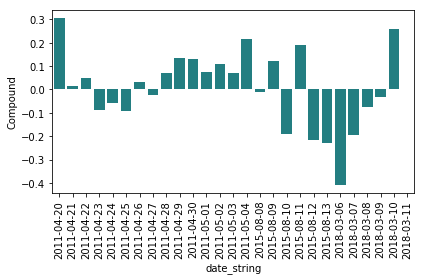

In [8]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby('date_string').mean().reset_index()
grouped.sort_values("date_string", ascending = True, inplace = True)
grouped.head()
sns.barplot(x = grouped["date_string"], y = grouped["Compound"], color = "#138D91")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('aldonsmith.png')
plt.show()